In [368]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm_notebook as tqdm
import csv

from ase import Atoms
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [369]:
from potentials import Lobato, Kirkland, Peng, Weickenmeier
N = 101
L = 10

box = np.array((L,) * 3)
atoms = Atoms('Ag', [box / 2], cell=box)
grid = (N,) * 3

lobato_calc = Lobato(atoms, grid, units='si')
kirkland_calc = Kirkland(atoms, grid, units='si')
peng_calc = Peng(atoms, grid, units='si')
weickenmeier_calc = Weickenmeier(atoms, grid, units='si')

_,_,z,_ = peng_calc.real_space_coordinates()

In [315]:
V_scattering = peng_calc.calc_from_scattering(f_min=.01)
V_splines = peng_calc.calc_from_splines(v_min=1e-6)

(6.0, 7.0)

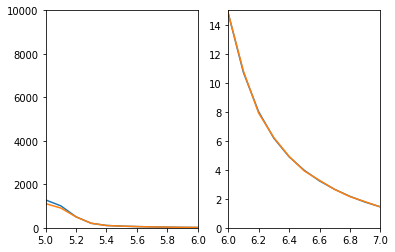

In [370]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z[N//2,N//2,:], V_splines[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
ax1.set_ylim([0,1e4])
ax1.set_xlim([L/2,L/2+1])

ax2.plot(z[N//2,N//2,:], V_peng[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_scattering[N//2,N//2,:]*1e10)
ax2.set_ylim([0,15])
ax2.set_xlim([L/2+1,L/2+2])

In [377]:
V_lobato = lobato_calc.calc_from_splines(v_min=1e-4)
V_kirkland = kirkland_calc.calc_from_splines(v_min=1e-4)
V_peng = peng_calc.calc_from_splines(v_min=1e-4)
V_weickenmeier = weickenmeier_calc.calc_from_splines(v_min=1e-4)

(6.0, 7.0)

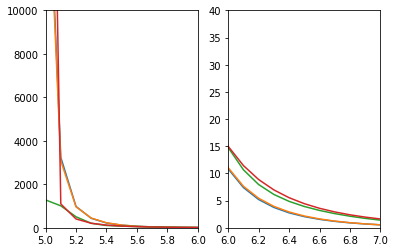

In [378]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z[N//2,N//2,:], V_lobato[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_kirkland[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_peng[N//2,N//2,:]*1e10)
ax1.plot(z[N//2,N//2,:], V_weickenmeier[N//2,N//2,:]*1e10)

ax1.set_ylim([0,1e4])
ax1.set_xlim([L/2,L/2+1])

ax2.plot(z[N//2,N//2,:], V_lobato[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_kirkland[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_peng[N//2,N//2,:]*1e10)
ax2.plot(z[N//2,N//2,:], V_weickenmeier[N//2,N//2,:]*1e10)
ax2.set_ylim([0,40])
ax2.set_xlim([L/2+1,L/2+2])